In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
from PIL import Image


In [2]:
def save_image(img, path):
    im = Image.fromarray(img)
    im.save(path)

def translation(img, quarter_height, quarter_width):
    height, width = img.shape[:2]
    quarter_height, quarter_width = height * quarter_height, width * quarter_width
    T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 
    # We use warpAffine to transform 
    # the image using the matrix, T 
    result = cv2.warpAffine(image, T, (width, height)) 
    return result

def rotate(img, angle):
    image_center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def flip(img):
    result = cv2.flip(img, 1)
    return result

# scale = [0, 0.5)
def zoom(img, scale):
    height, width = img.shape[0:2]
    height = height * scale
    width =  width * scale
    pts_o = np.float32([[height, width], [img.shape[0] - height, width], [height, img.shape[1] - width], [img.shape[0] - height, img.shape[1] - width]])
    pts_d = np.float32([[0, 0], [img.shape[0], 0], [0, img.shape[1]], [img.shape[0], img.shape[1]]])
    M = cv2.getPerspectiveTransform(pts_o, pts_d)
    # apply transformation
    result = cv2.warpPerspective(img, M, img.shape[0:2])
    return result

# g(i,j)=α⋅f(i,j) + β
def contrast(img, alpha, beta):
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return result

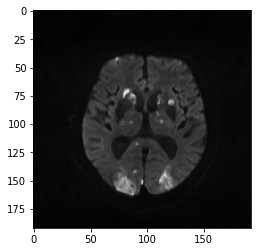

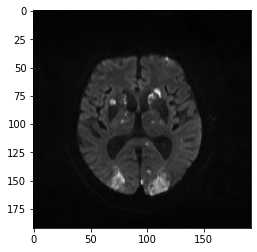

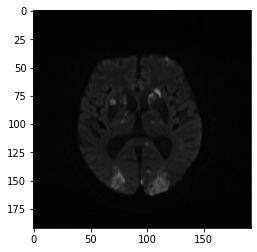

In [5]:
image = cv2.imread(r'C:\Users\leoxz\Documents\GitHub\MRI-Image-Detection\images\TS\Case 8\16.jpg') 
plt.imshow(image)
plt.show()
image = flip(image)
plt.imshow(image)
plt.show()
image = contrast(image, 0.5, 0)
plt.imshow(image)
plt.show()
# save_image(img, r'C:\Users\leoxz\Documents\GitHub\MRI-Image-Processing\images\test\your_file.jpeg')

